In [66]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.impute import IterativeImputer 
from sklearn.model_selection import cross_val_score


In [67]:
from sklearn.experimental import enable_iterative_imputer


In [68]:
df4=pd.read_csv('assesing data/smartphones.csv')


In [69]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 830 non-null    object 
 1   model                      830 non-null    object 
 2   price                      830 non-null    int64  
 3   rating                     830 non-null    int64  
 4   has_5g                     830 non-null    bool   
 5   has_nfc                    830 non-null    bool   
 6   has_ir_blaster             830 non-null    bool   
 7   processor_brand            822 non-null    object 
 8   num_cores                  830 non-null    int64  
 9   processor_speed            830 non-null    float64
 10  battery_capacity           830 non-null    int64  
 11  fast_charging_available    830 non-null    int64  
 12  fast_charging              687 non-null    float64
 13  ram_capacity               830 non-null    int64  

In [70]:
df4.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                         0
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand                8
num_cores                      0
processor_speed                0
battery_capacity               0
fast_charging_available        0
fast_charging                143
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              0
os                             8
primary_camera_rear            0
primary_camera_front           0
extended_memory_available      0
extended_upto                378
resolution_width               0
resolution_height              0
dtype: int64

In [71]:
df4.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,687.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.00000,452.000000,830.000000,830.000000
mean,27410.175904,78.492771,7.901205,2.411892,4870.161446,0.883133,44.244541,6.468675,132.703614,6.550843,92.208434,2.838554,1.025301,50.206747,16.299157,0.66988,744.212389,1055.257831,2210.660241
std,35230.716416,7.416724,0.533440,0.421380,1011.445846,0.321456,33.555335,2.465366,83.348536,0.224129,28.438216,0.725518,0.157133,28.938978,10.174748,0.47054,362.534499,267.479661,459.516616
min,3499.000000,60.000000,4.000000,1.300000,1821.000000,0.000000,10.000000,2.000000,32.000000,4.700000,60.000000,1.000000,1.000000,8.000000,2.100000,0.00000,64.000000,720.000000,720.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,48.000000,8.000000,0.00000,512.000000,1080.000000,1792.000000
50%,18999.000000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.00000,1024.000000,1080.000000,2400.000000
75%,29990.000000,84.000000,8.000000,2.782500,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.00000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,7.800000,240.000000,4.000000,2.000000,200.000000,60.000000,1.00000,2048.000000,2460.000000,3840.000000


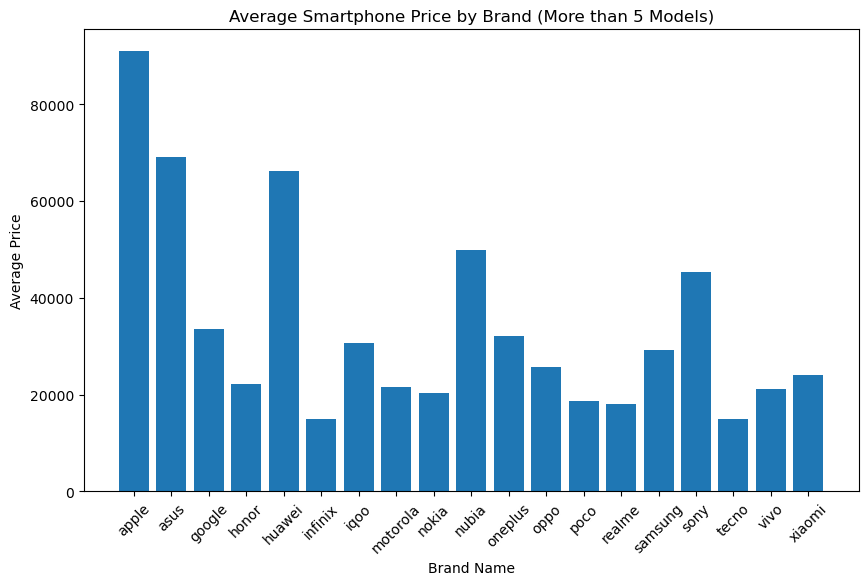

In [72]:
# Avg_price by brand_name which has more than 5 phone
count_phones=df4.groupby('brand_name')['model'].size()
brands=count_phones[count_phones>5].index
phone_price=df4[df4['brand_name'].isin(brands)].groupby('brand_name')['price'].mean()
plt.figure(figsize=(10, 6))
plt.bar(phone_price.index, phone_price.values, color="#1f77b4")
plt.title('Average Smartphone Price by Brand (More than 5 Models)')
plt.xlabel('Brand Name')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

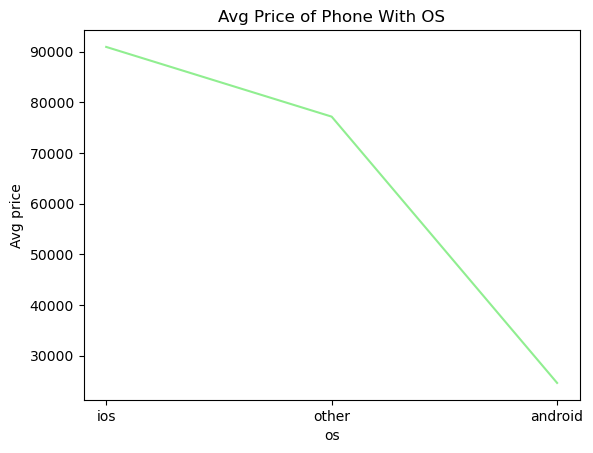

In [73]:
os_avg_price=df4.groupby('os')['price'].mean().reset_index(name='Avg_Price').sort_values(by='Avg_Price',ascending=False)
plt.plot(os_avg_price['os'],os_avg_price["Avg_Price"],color="lightgreen")
plt.title('Avg Price of Phone With OS')
plt.xlabel('os')
plt.ylabel('Avg price')
plt.show()

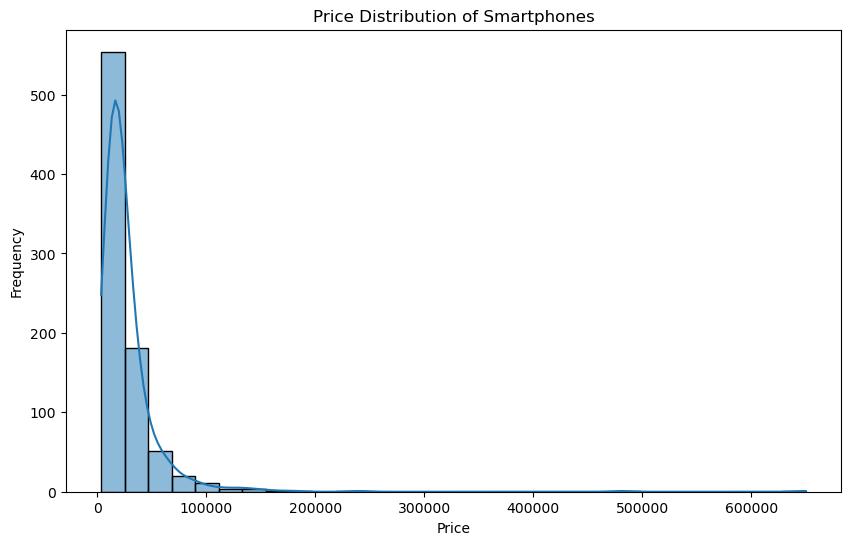

In [74]:
#Price Distribution  # target variable

plt.figure(figsize=(10, 6))
sns.histplot(df4['price'], bins=30, kde=True)
plt.title('Price Distribution of Smartphones')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


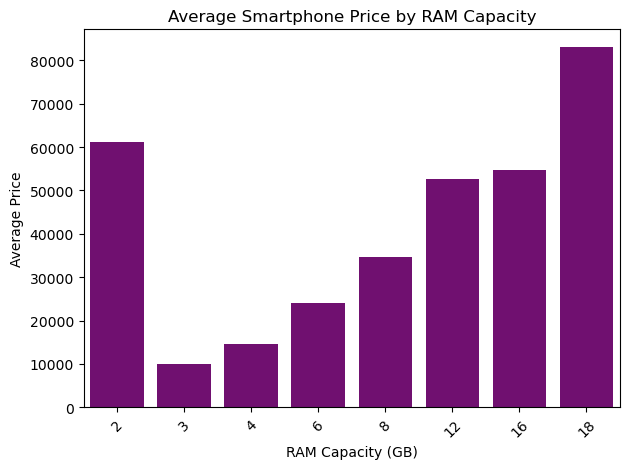

In [75]:
ram_cap=df4.groupby('ram_capacity')['price'].mean().reset_index(name="Avg_Price").sort_values(by="Avg_Price",ascending=False)
sns.barplot(x='ram_capacity', y='Avg_Price', data=ram_cap, color='purple')
plt.title('Average Smartphone Price by RAM Capacity')
plt.xlabel('RAM Capacity (GB)')
plt.ylabel('Average Price')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

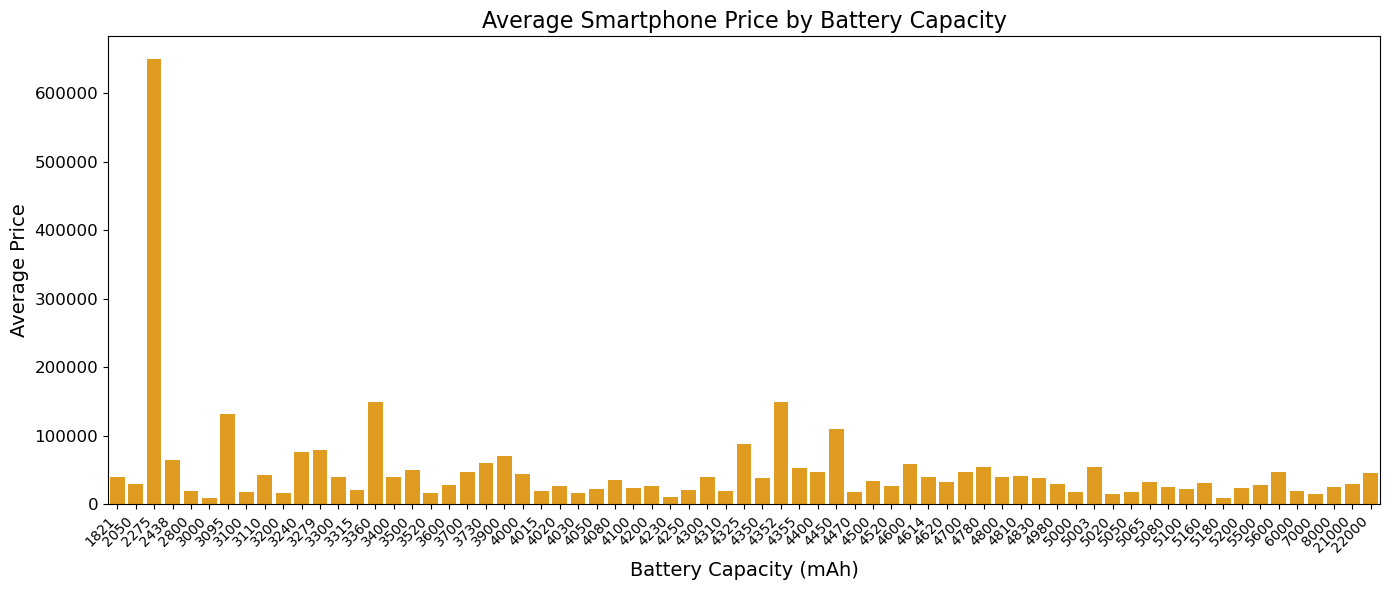

In [76]:
#Average Price by Battery Capacity
Avg_battery_cap_price=df4.groupby('battery_capacity')['price'].mean().reset_index(name="Avg_Price")
Avg_battery_cap_price
plt.figure(figsize=(14, 6))  # Wider figure
sns.barplot(x='battery_capacity', y='Avg_Price', data=Avg_battery_cap_price, color='orange')
plt.title('Average Smartphone Price by Battery Capacity', fontsize=16)
plt.xlabel('Battery Capacity (mAh)', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=12) 
plt.subplots_adjust(bottom=0.25, left=0.1, right=0.9, top=0.9) 
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

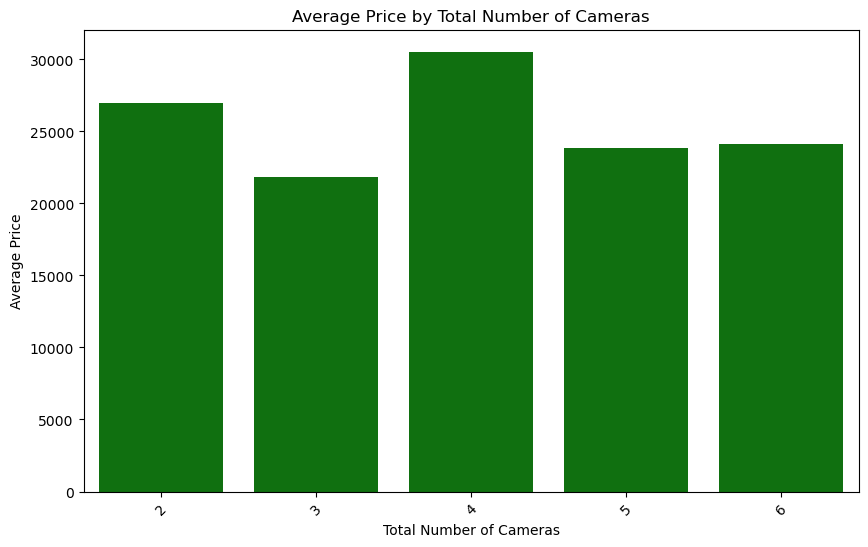

In [77]:
#Total Camera Average Price
df4['Total_Camera']=df4['num_rear_cameras'] + df4["num_front_cameras"]
average_price_for_brand=df4.groupby('Total_Camera')['price'].mean().reset_index(name="Avg_price_camera")
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Camera', y='Avg_price_camera', data=average_price_for_brand, color='green')
plt.title('Average Price by Total Number of Cameras')
plt.xlabel('Total Number of Cameras')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_27128\3252833722.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='has_5g', y='Avg_price', data=Has_5g, palette='viridis', hue=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


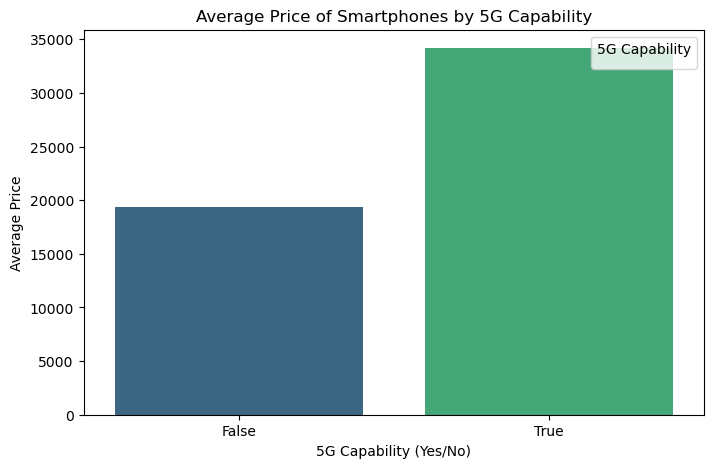

In [78]:
#has_5g
Has_5g=df4.groupby('has_5g')['price'].mean().reset_index(name="Avg_price")
plt.figure(figsize=(8, 5))
sns.barplot(x='has_5g', y='Avg_price', data=Has_5g, palette='viridis', hue=None) 
plt.title('Average Price of Smartphones by 5G Capability')
plt.xlabel('5G Capability (Yes/No)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.legend(title='5G Capability', loc='upper right')
plt.show()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_27128\1952630295.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand_name', y='model_count', data=brands_with_more_than_6_models, palette='viridis')


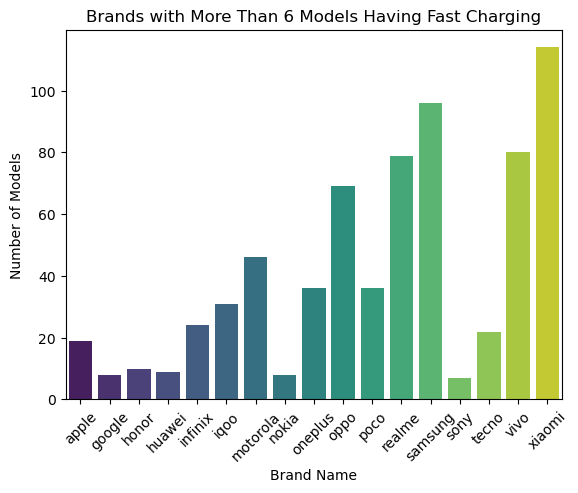

In [79]:
#Fast Charging phone Brand_wise
Fast_charging=df4[(df4["fast_charging_available"]==1)]
brand_model_count=Fast_charging.groupby('brand_name')['model'].size().reset_index(name="model_count")
brands_with_more_than_6_models=brand_model_count[brand_model_count['model_count'] > 6]
sns.barplot(x='brand_name', y='model_count', data=brands_with_more_than_6_models, palette='viridis')
plt.title('Brands with More Than 6 Models Having Fast Charging')
plt.xlabel('Brand Name')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.show()

C:\Users\Mihir\AppData\Local\Temp\ipykernel_27128\923999725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='screen_size', y='Avg_Price', data=Screen_size, palette='viridis')


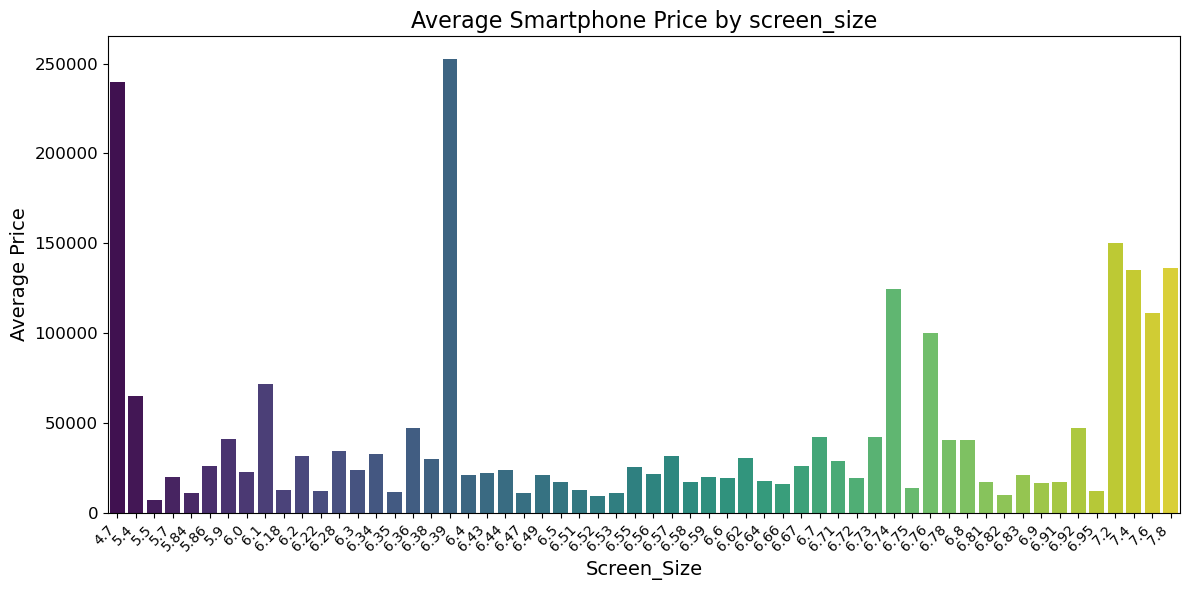

In [80]:
Screen_size=df4.groupby('screen_size')['price'].mean().reset_index(name="Avg_Price")
plt.figure(figsize=(12, 6))
sns.barplot(x='screen_size', y='Avg_Price', data=Screen_size, palette='viridis')
plt.title('Average Smartphone Price by screen_size', fontsize=16)
plt.xlabel('Screen_Size', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=12)  
plt.subplots_adjust(bottom=0.25, left=0.1, right=0.9, top=0.9)  
plt.tight_layout()  
plt.show()

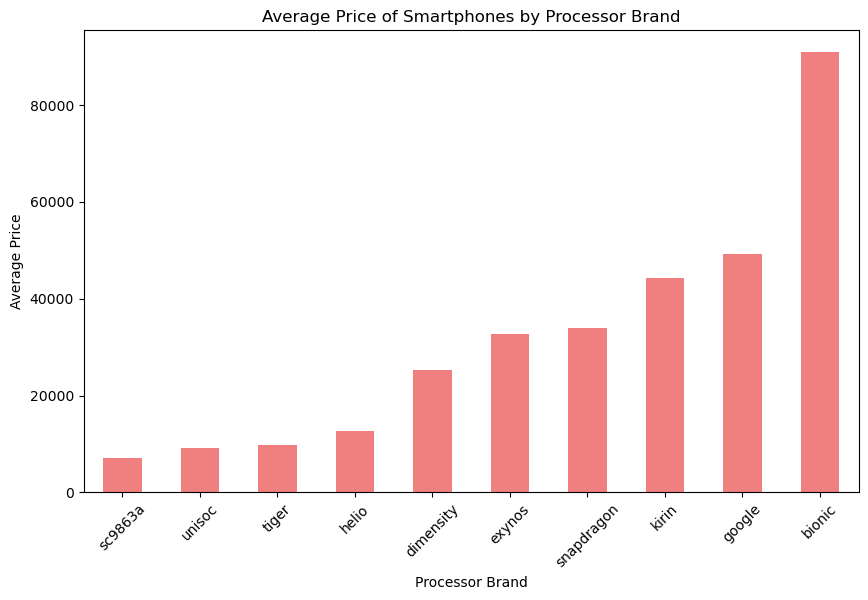

In [81]:
avg_price_processor = df4.groupby('processor_brand')['price'].mean().sort_values()
plt.figure(figsize=(10, 6))
avg_price_processor.plot(kind='bar', color='lightcoral')
plt.title('Average Price of Smartphones by Processor Brand')
plt.xlabel('Processor Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

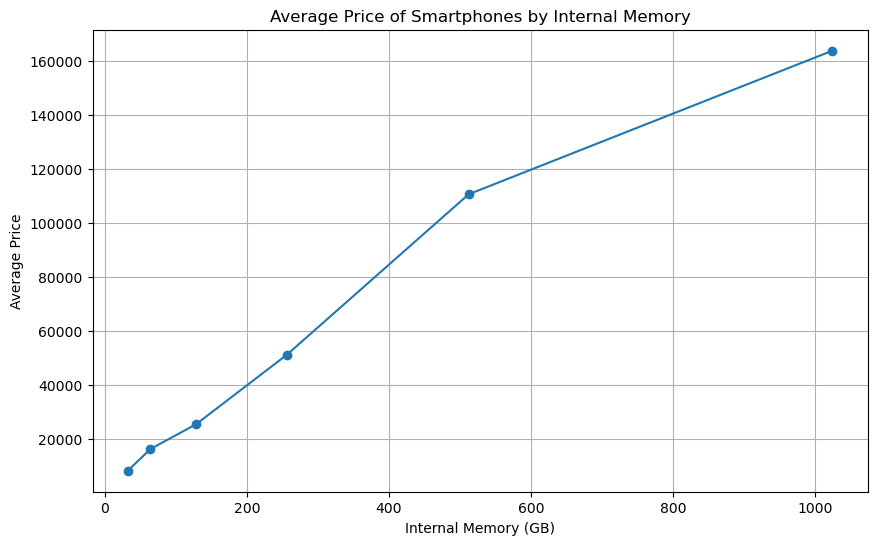

In [82]:
avg_price_memory = df4.groupby('internal_memory')['price'].mean()
plt.figure(figsize=(10, 6))
avg_price_memory.plot(kind='line', marker='o')
plt.title('Average Price of Smartphones by Internal Memory')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Average Price')
plt.grid()
plt.show()

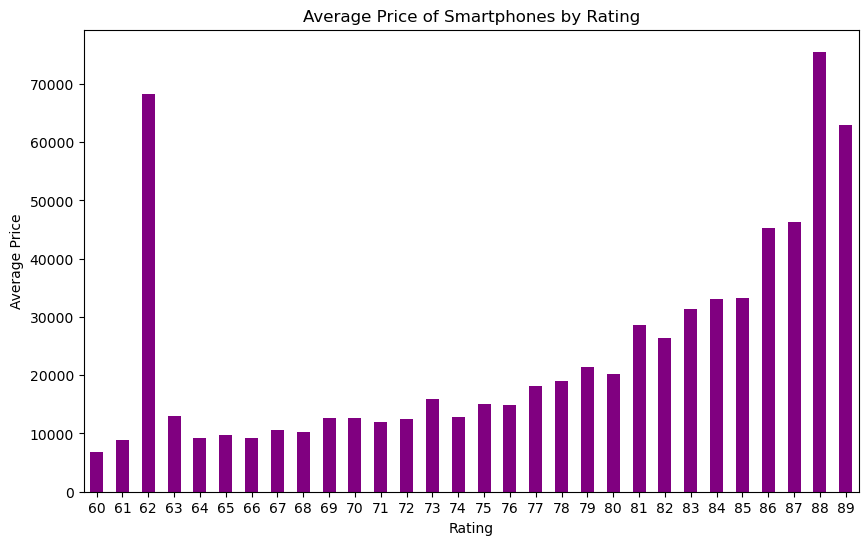

In [83]:
avg_price_rating = df4.groupby('rating')['price'].mean().sort_index()
plt.figure(figsize=(10, 6))
avg_price_rating.plot(kind='bar', color='purple')
plt.title('Average Price of Smartphones by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [84]:
df4['price'].skew()

10.133611757612536

<Axes: ylabel='price'>

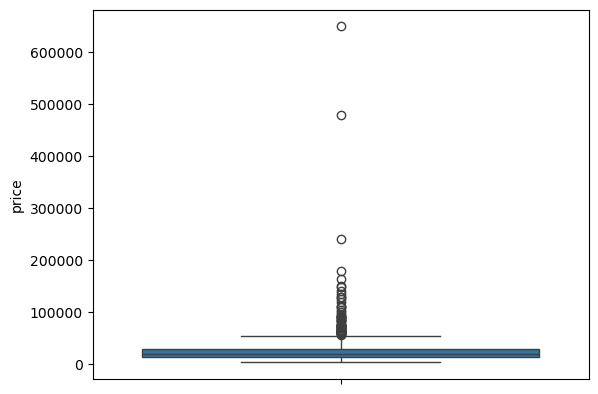

In [85]:
sns.boxplot(df4['price'])

<Axes: xlabel='price', ylabel='Count'>

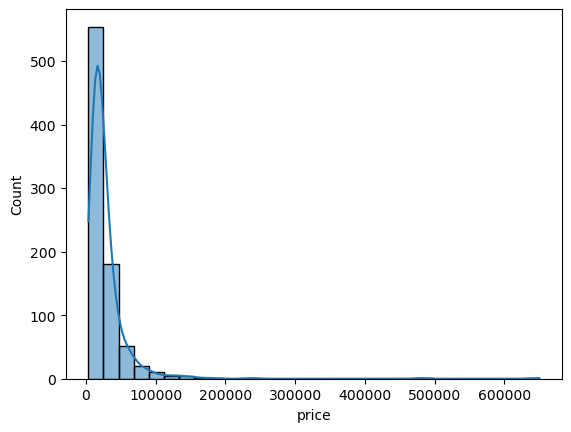

In [86]:
sns.histplot(df4['price'],kde=True,bins=30)

In [87]:
q1=df4['price'].quantile(0.25)
q3=df4['price'].quantile(0.95)

Iqr=q3-q1

lower_bound=q1-1.5*Iqr
upper_bound=q3+1.5*Iqr

print(f"lower bound:{lower_bound},upper bound:{upper_bound}")

outliers=df4[(df4['price']<lower_bound)|(df4['price']>upper_bound)]
print(len(outliers))

lower bound:-72494.92499999999,upper bound:155488.875
5


In [88]:
premimum_phones=df4[df4['price']>155488.875]

In [89]:
df4['adjusted_price']=np.where((df4['price']<lower_bound)|(df4['price']>upper_bound),np.nan,df4['price'])

In [90]:
df4['adjusted_price'].describe()

count       825.000000
mean      25500.069091
std       20511.153164
min        3499.000000
25%       12999.000000
50%       18990.000000
75%       29990.000000
max      149999.000000
Name: adjusted_price, dtype: float64

In [91]:
import pandas as pd

# Assuming df4 is your DataFrame
skewness = {}

# Loop through each numerical column in the DataFrame
for column in df4.select_dtypes(include=['float64', 'int64']).columns:
    skewness[column] = df4[column].skew()  # Calculate skewness

# Convert the skewness dictionary to a DataFrame for better visualization
skewness_df = pd.DataFrame(list(skewness.items()), columns=['Column', 'Skewness'])

# Print the skewness DataFrame
print(skewness_df)


                       Column   Skewness
0                       price  10.133612
1                      rating  -0.733837
2                   num_cores  -5.873141
3             processor_speed   0.509449
4            battery_capacity  10.672703
5     fast_charging_available  -2.389490
6               fast_charging   1.845054
7                ram_capacity   0.956648
8             internal_memory   4.103592
9                 screen_size  -2.267281
10               refresh_rate   0.336652
11           num_rear_cameras  -0.484943
12          num_front_cameras   6.056592
13        primary_camera_rear   1.491943
14       primary_camera_front   1.487299
15  extended_memory_available  -0.723806
16              extended_upto   0.221750
17           resolution_width   2.281095
18          resolution_height  -0.853106
19               Total_Camera  -0.281571
20             adjusted_price   2.647521


In [92]:
df4['processor_speed'].skew()

0.5094491201167052

In [93]:
#battery_capacity
q1=df4['battery_capacity'].quantile(0.25)
q3=df4['battery_capacity'].quantile(0.75)

Iqr=q3-q1

lower_bound=q1-1.5*Iqr
upper_bound=q3+1.5*Iqr

print(f"lower bound:{lower_bound},upper bound:{upper_bound}")


outliers=df4[(df4['battery_capacity']<lower_bound)|(df4['battery_capacity']>upper_bound)]
print(len(outliers))


lower bound:3750.0,upper bound:5750.0
99


In [94]:
df4['battery_capacity_capped'] = df4['battery_capacity'].clip(lower=3750, upper=5750)


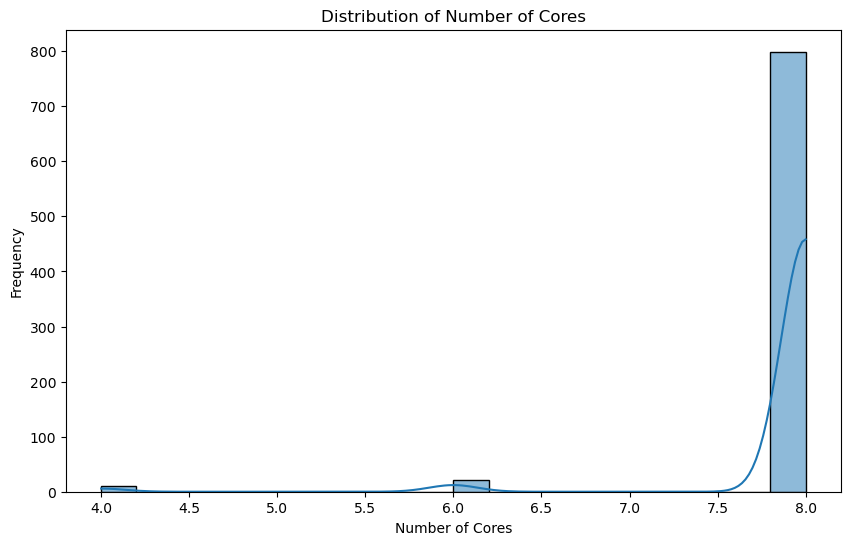

In [95]:
#num cores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df4['num_cores'], bins=20, kde=True)
plt.title('Distribution of Number of Cores')
plt.xlabel('Number of Cores')
plt.ylabel('Frequency')
plt.show()



In [96]:
q1=df4['num_cores'].quantile(0.25)
q3=df4['num_cores'].quantile(0.75)

iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print(f"lower bound:{lower_bound},upper bound:{upper_bound}")

outliers_num=df4[(df4['num_cores']<lower_bound)|(df4['num_cores']>upper_bound)]
len(outliers)

lower bound:8.0,upper bound:8.0


99

In [97]:
df4['adjusted_num_core'] = df4['num_cores'].clip(lower=6.0, upper=8.0)


<Axes: xlabel='internal_memory', ylabel='Count'>

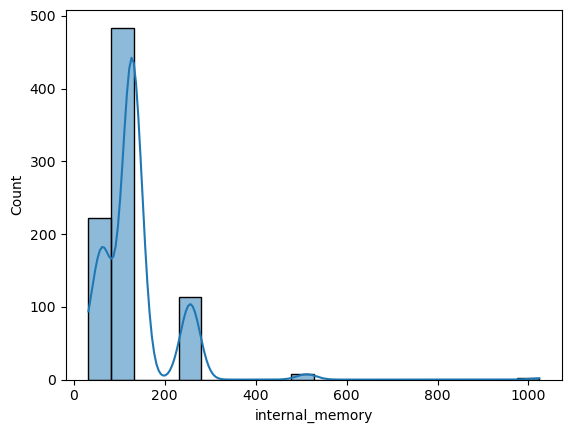

In [98]:
#internal_memory
sns.histplot(df4['internal_memory'],bins=20,kde=True)

In [99]:
df4['adjusted_internal_memory']=df4['internal_memory'].clip(lower=32,upper=512)

<Axes: xlabel='adjusted_internal_memory', ylabel='Count'>

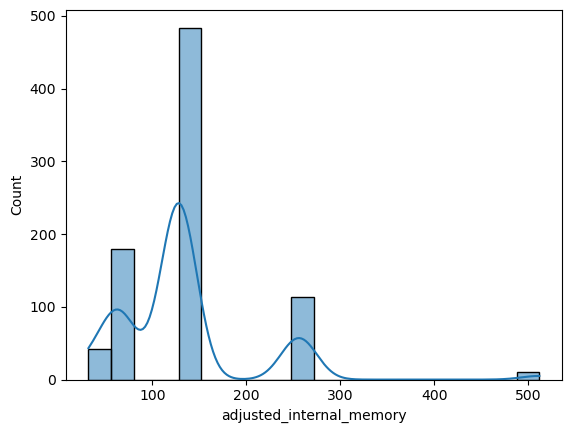

In [100]:
sns.histplot(df4['adjusted_internal_memory'],bins=20,kde=True)

In [101]:
#screen_size()

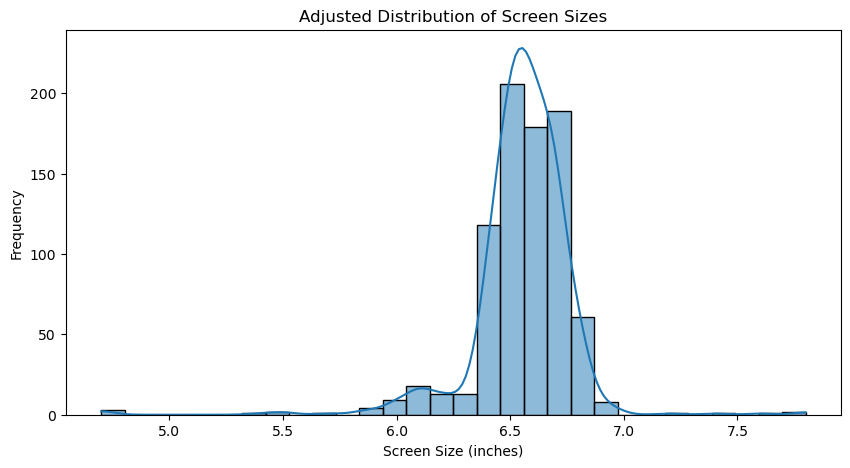

In [102]:
plt.figure(figsize=(10, 5))
sns.histplot(df4['screen_size'], bins=30, kde=True)
plt.title('Adjusted Distribution of Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Frequency')
plt.show()


In [103]:
#screen_size
q1=df4['screen_size'].quantile(0.25)
q3=df4['screen_size'].quantile(0.75)
Iqr=q3-q1
lower_bound=q1-1.5*Iqr
upper_bound=q3+1.5*Iqr

print(f"lower bound:{lower_bound},upper bound:{upper_bound}")
outlier=df4[(df4['screen_size']<lower_bound)|(df4['screen_size']>upper_bound)]
len(outliers)

lower bound:6.245,upper bound:6.925


99

In [104]:
df4['adjusted_screen_size']=df4['screen_size'].clip(lower=6.245,upper=6.925)

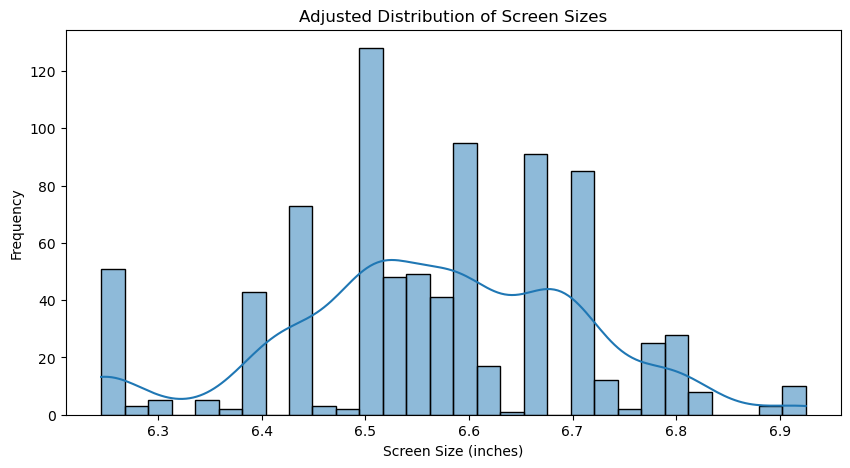

In [105]:
plt.figure(figsize=(10, 5))
sns.histplot(df4['adjusted_screen_size'], bins=30, kde=True)
plt.title('Adjusted Distribution of Screen Sizes')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Frequency')
plt.show()


In [106]:
df4.groupby('adjusted_screen_size')['model'].count().reset_index()

,adjusted_screen_size,model
0,6.245,51
1,6.280,3
2,6.300,5
3,6.340,1
4,6.350,4
5,6.360,1
6,6.380,1
7,6.390,2
8,6.400,41
9,6.430,43


In [107]:
#fast charging
q1=df4['fast_charging'].quantile(0.25)
q3=df4['fast_charging'].quantile(0.75)
Iqr=q3-q1
lower_bound=q1-1.5*Iqr
upper_bound=q3+1.5*Iqr

print(f"lower bound:{lower_bound},upper bound:{upper_bound}")
outlier=df4[(df4['fast_charging']<lower_bound)|(df4['fast_charging']>upper_bound)]
len(outliers)

lower bound:-54.0,upper bound:138.0


99

In [108]:
df4['adjusted_fast_charging'] = df4['fast_charging'].clip(upper=138)

In [109]:
df4.groupby('primary_camera_rear')['model'].count()

primary_camera_rear
8.0       19
12.0      41
12.2       2
13.0     104
16.0      17
20.0       3
24.0       2
47.2       1
48.0     101
50.0     293
54.0       3
64.0     171
108.0     65
200.0      8
Name: model, dtype: int64

In [110]:
#primary camera rear
q1=df4['primary_camera_rear'].quantile(0.25)
q3=df4['primary_camera_rear'].quantile(0.75)
Iqr=q3-q1
lower_bound=q1-1.5*Iqr
upper_bound=q3+1.5*Iqr

print(f"lower bound:{lower_bound},upper bound:{upper_bound}")
outlier=df4[(df4['primary_camera_rear']<lower_bound)|(df4['primary_camera_rear']>upper_bound)]
len(outliers)

lower bound:24.0,upper bound:88.0


99

In [111]:
df4['adjusted_primary_camera_rear'] = df4['primary_camera_rear'].clip(upper=88)


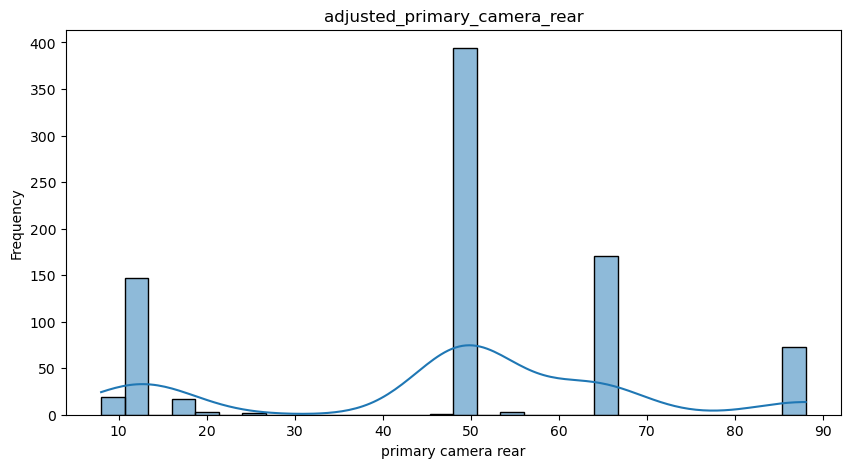

In [112]:
plt.figure(figsize=(10, 5))
sns.histplot(df4['adjusted_primary_camera_rear'], bins=30, kde=True)
plt.title('adjusted_primary_camera_rear')
plt.xlabel('primary camera rear')
plt.ylabel('Frequency')
plt.show()


In [113]:
#primary camera front
q1=df4['primary_camera_front'].quantile(0.25)
q3=df4['primary_camera_front'].quantile(0.75)
Iqr=q3-q1
lower_bound=q1-1.5*Iqr
upper_bound=q3+1.5*Iqr

print(f"lower bound:{lower_bound},upper bound:{upper_bound}")
outlier=df4[(df4['primary_camera_front']<lower_bound)|(df4['primary_camera_front']>upper_bound)]
len(outliers)

lower bound:-4.0,upper bound:28.0


99

In [114]:
df4['adjusted_primary_camera_front'] = df4['primary_camera_front'].clip(upper=28.0)


In [115]:
df4.isnull().sum()

brand_name                         0
model                              0
price                              0
rating                             0
has_5g                             0
has_nfc                            0
has_ir_blaster                     0
processor_brand                    8
num_cores                          0
processor_speed                    0
battery_capacity                   0
fast_charging_available            0
fast_charging                    143
ram_capacity                       0
internal_memory                    0
screen_size                        0
refresh_rate                       0
num_rear_cameras                   0
num_front_cameras                  0
os                                 8
primary_camera_rear                0
primary_camera_front               0
extended_memory_available          0
extended_upto                    378
resolution_width                   0
resolution_height                  0
Total_Camera                       0
a

In [116]:
median_price = df4['adjusted_price'].median()
df4['adjusted_price'].fillna(median_price, inplace=True)
df4['adjusted_price'] = np.log1p(df4['adjusted_price'])


C:\Users\Mihir\AppData\Local\Temp\ipykernel_27128\2729990039.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['adjusted_price'].fillna(median_price, inplace=True)


In [117]:
df4.isnull().sum()

brand_name                         0
model                              0
price                              0
rating                             0
has_5g                             0
has_nfc                            0
has_ir_blaster                     0
processor_brand                    8
num_cores                          0
processor_speed                    0
battery_capacity                   0
fast_charging_available            0
fast_charging                    143
ram_capacity                       0
internal_memory                    0
screen_size                        0
refresh_rate                       0
num_rear_cameras                   0
num_front_cameras                  0
os                                 8
primary_camera_rear                0
primary_camera_front               0
extended_memory_available          0
extended_upto                    378
resolution_width                   0
resolution_height                  0
Total_Camera                       0
a

In [118]:
rare_threshold = 5 
df4['brand_name_grouped'] = df4['brand_name'].apply(
    lambda x: x if df4['brand_name'].value_counts()[x] > rare_threshold else 'Other'
)
df4['brand_freq'] = df4['brand_name_grouped'].map(
    df4['brand_name_grouped'].value_counts()
)

model_target_mean = df4.groupby('model')['price'].mean()
df4['model_encoded'] = df4['model'].map(model_target_mean)

# Step 4: Frequency Encoding for the model column
df4['model_freq'] = df4['model'].map(df4['model'].value_counts())

print(df4[['brand_name_grouped', 'brand_freq', 'model', 'model_encoded', 'model_freq']].head())


  brand_name_grouped  brand_freq                      model  model_encoded  \
0            oneplus          37              OnePlus 11 5G        54999.0   
1            oneplus          37  OnePlus Nord CE 2 Lite 5G        19989.0   
2            samsung         103      Samsung Galaxy A14 5G        16499.0   
3           motorola          48       Motorola Moto G62 5G        14999.0   
4             realme          92         Realme 10 Pro Plus        24999.0   

   model_freq  
0           1  
1           1  
2           1  
3           1  
4           1  


In [119]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   brand_name                     830 non-null    object 
 1   model                          830 non-null    object 
 2   price                          830 non-null    int64  
 3   rating                         830 non-null    int64  
 4   has_5g                         830 non-null    bool   
 5   has_nfc                        830 non-null    bool   
 6   has_ir_blaster                 830 non-null    bool   
 7   processor_brand                822 non-null    object 
 8   num_cores                      830 non-null    int64  
 9   processor_speed                830 non-null    float64
 10  battery_capacity               830 non-null    int64  
 11  fast_charging_available        830 non-null    int64  
 12  fast_charging                  687 non-null    flo

In [120]:
features = [
    'has_5g', 
    'has_nfc', 
    'has_ir_blaster',
    'processor_brand', 
    'processor_speed', 
    'battery_capacity_capped',
    'fast_charging_available', 
    'adjusted_fast_charging',
    'ram_capacity',
    'adjusted_screen_size', 
    'refresh_rate', 
    'num_rear_cameras',
    'num_front_cameras',
    'adjusted_num_core',
    'os', 
    'adjusted_primary_camera_rear', 
    'primary_camera_front',
    'adjusted_internal_memory',
    'extended_memory_available', 
    'resolution_width', 
    'adjusted_primary_camera_front',
    'brand_name_grouped', 
    'brand_freq', 
    'model_encoded', 
    'model_freq'
]


In [121]:
df4["model_freq"]

0      1
1      1
2      1
3      1
4      1
      ..
825    1
826    1
827    1
828    1
829    1
Name: model_freq, Length: 830, dtype: int64

In [122]:
X=df4[features]
y=df4['adjusted_price']


In [123]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:
numerical_transformers = ColumnTransformer(transformers=[
    ('imputer1', make_pipeline(IterativeImputer(),FunctionTransformer(np.log1p, validate=True)), ['adjusted_fast_charging']),
    ('log1p', make_pipeline(FunctionTransformer(np.log1p, validate=True)), ['adjusted_internal_memory', 'adjusted_num_core', 'ram_capacity', 'processor_speed']),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False), ['ram_capacity', 'processor_speed'])
], remainder='passthrough')

In [125]:
categorical_transformers = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False), ['processor_brand', 'os', 'brand_name_grouped'])
    ],remainder='passthrough'
)

In [126]:
preprocessor = ColumnTransformer(
   transformers=[
        ('numerical', numerical_transformers, ['adjusted_fast_charging','ram_capacity', 'processor_speed','adjusted_internal_memory', 'adjusted_num_core',]),
       ('categorical', categorical_transformers, ['processor_brand', 'os', 'brand_name_grouped']),
        ('polynomial', PolynomialFeatures(degree=6, include_bias=False), ['ram_capacity', 'processor_speed'])

    ],remainder='passthrough')

In [127]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Multi-layer Perceptron (MLP) Regression': MLPRegressor(max_iter=4000),
}

In [130]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA

for model_name, model in regressors.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),   
        ('scaler',StandardScaler()),
        #('pca', PCA(n_components=17)),    
        ('regressor', model),
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on validation data
    y_pred = pipeline.predict(X_val)

    # Evaluate the model
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Print the results for each model
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print()
   

Model: Linear Regression
Mean Absolute Error: 0.1676
Mean Squared Error: 0.0551
R-squared: 0.8804

Model: Ridge Regression
Mean Absolute Error: 0.1612
Mean Squared Error: 0.0560
R-squared: 0.8784

Model: Lasso Regression
Mean Absolute Error: 0.5527
Mean Squared Error: 0.4621
R-squared: -0.0033

Model: ElasticNet Regression
Mean Absolute Error: 0.5527
Mean Squared Error: 0.4621
R-squared: -0.0033

Model: Support Vector Regression
Mean Absolute Error: 0.1324
Mean Squared Error: 0.0353
R-squared: 0.9234

Model: K-Nearest Neighbors Regression
Mean Absolute Error: 0.1902
Mean Squared Error: 0.0713
R-squared: 0.8452

Model: Random Forest Regression
Mean Absolute Error: 0.0157
Mean Squared Error: 0.0152
R-squared: 0.9670

Model: Gradient Boosting Regression
Mean Absolute Error: 0.0164
Mean Squared Error: 0.0243
R-squared: 0.9473

Model: AdaBoost Regression
Mean Absolute Error: 0.0488
Mean Squared Error: 0.0247
R-squared: 0.9464

Model: Decision Tree Regression
Mean Absolute Error: 0.0161
Mean

In [132]:
for model_name, model in regressors.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),   
        ('scaler',StandardScaler()),
        ('regressor', model),
    ])

    # Cross-Validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)

    # Fit the model on full training data
    pipeline.fit(X_train, y_train)

    # Predict on validation data
    y_pred = pipeline.predict(X_val)

    # Evaluate the model
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Print the results for each model
    print(f"Model: {model_name}")
    print(f"Cross-Validated RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print()


C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Linear Regression
Cross-Validated RMSE: 1721841028.1090 ± 3443682055.5570
Mean Absolute Error: 0.1676
Mean Squared Error: 0.0551
R-squared: 0.8804

Model: Ridge Regression
Cross-Validated RMSE: 0.2970 ± 0.0730
Mean Absolute Error: 0.1612
Mean Squared Error: 0.0560
R-squared: 0.8784



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Lasso Regression
Cross-Validated RMSE: 0.6142 ± 0.0276
Mean Absolute Error: 0.5527
Mean Squared Error: 0.4621
R-squared: -0.0033

Model: ElasticNet Regression
Cross-Validated RMSE: 0.6142 ± 0.0276
Mean Absolute Error: 0.5527
Mean Squared Error: 0.4621
R-squared: -0.0033



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Support Vector Regression
Cross-Validated RMSE: 0.2114 ± 0.0183
Mean Absolute Error: 0.1324
Mean Squared Error: 0.0353
R-squared: 0.9234



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: K-Nearest Neighbors Regression
Cross-Validated RMSE: 0.2771 ± 0.0103
Mean Absolute Error: 0.1902
Mean Squared Error: 0.0713
R-squared: 0.8452



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Random Forest Regression
Cross-Validated RMSE: 0.0642 ± 0.0549
Mean Absolute Error: 0.0166
Mean Squared Error: 0.0163
R-squared: 0.9645



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Gradient Boosting Regression
Cross-Validated RMSE: 0.0464 ± 0.0634
Mean Absolute Error: 0.0165
Mean Squared Error: 0.0243
R-squared: 0.9473



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: AdaBoost Regression
Cross-Validated RMSE: 0.0726 ± 0.0479
Mean Absolute Error: 0.0511
Mean Squared Error: 0.0231
R-squared: 0.9498

Model: Decision Tree Regression
Cross-Validated RMSE: 0.0553 ± 0.0623
Mean Absolute Error: 0.0165
Mean Squared Error: 0.0258
R-squared: 0.9439



C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Mihir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Model: Multi-layer Perceptron (MLP) Regression
Cross-Validated RMSE: 0.5961 ± 0.2371
Mean Absolute Error: 0.3008
Mean Squared Error: 0.1838
R-squared: 0.6009

